# Predicting Heaart disease using machine learning

This project looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model which is capable of telling whether someone has heart diese or not based on their medical attributes

# Problem Definition
Given the clinical parameters about a patient, can we predict whether or not they have heart disease

# Data
The data is taken from the UCI Machine Learning Repository,also taken from kaggle in the form of csv file.https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

# Evaluation: 
The aim is to reach 90% accuracy at predicting the target ,ie whether or not a patient has heart disease during the proof of concept

# Features
Data Dictionary - the csv file has been changed so that all the values at numerical, which is necessary for training the model

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality 
        can range from mild symptoms to severe problems 
        signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 0: fixed defect: used to be defect but ok now
    * 2: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# preparing the tools 
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Import Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# load data
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA- Exploratory Data Analysis
Find Out more about the data

### About the target 

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df["target"].value_counts(normalize =True)

1    0.544554
0    0.455446
Name: target, dtype: float64

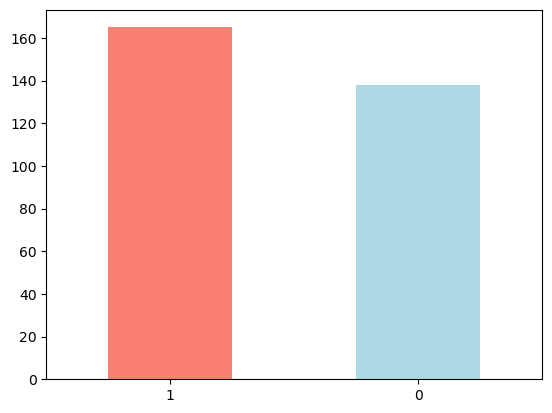

In [5]:
df["target"].value_counts().plot(kind="bar", color =["salmon","lightblue"]);
plt.xticks(rotation =0 );

### About the features

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values

### Comaparison between Sex and Target frequency


In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

1- male 2- female

In [9]:
table0 = pd.crosstab(df.target,df.sex)

we find that 72/96 = 75% female participants have heart disease and 93/207 = 45% male participant have heart disease and 165/303 = 54.45% chance a participant overall has heart disease

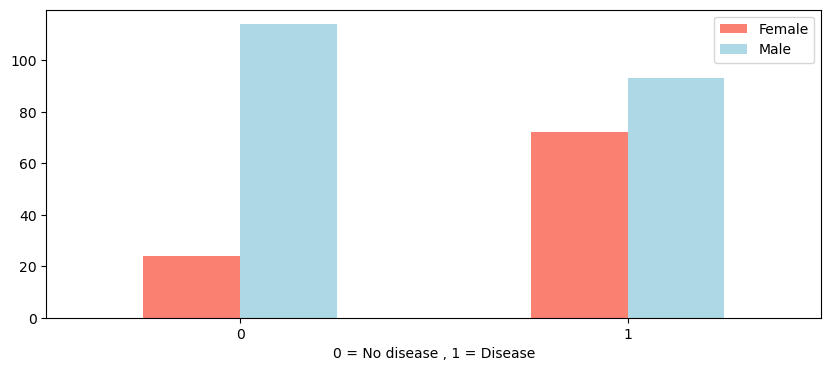

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize = (10,4),
                                   color =["salmon", "lightblue"] )
plt.xlabel("0 = No disease , 1 = Disease")
plt.legend(["Female","Male"])
plt.xticks(rotation =0 );

### Comparision between age and target frequency

In [11]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

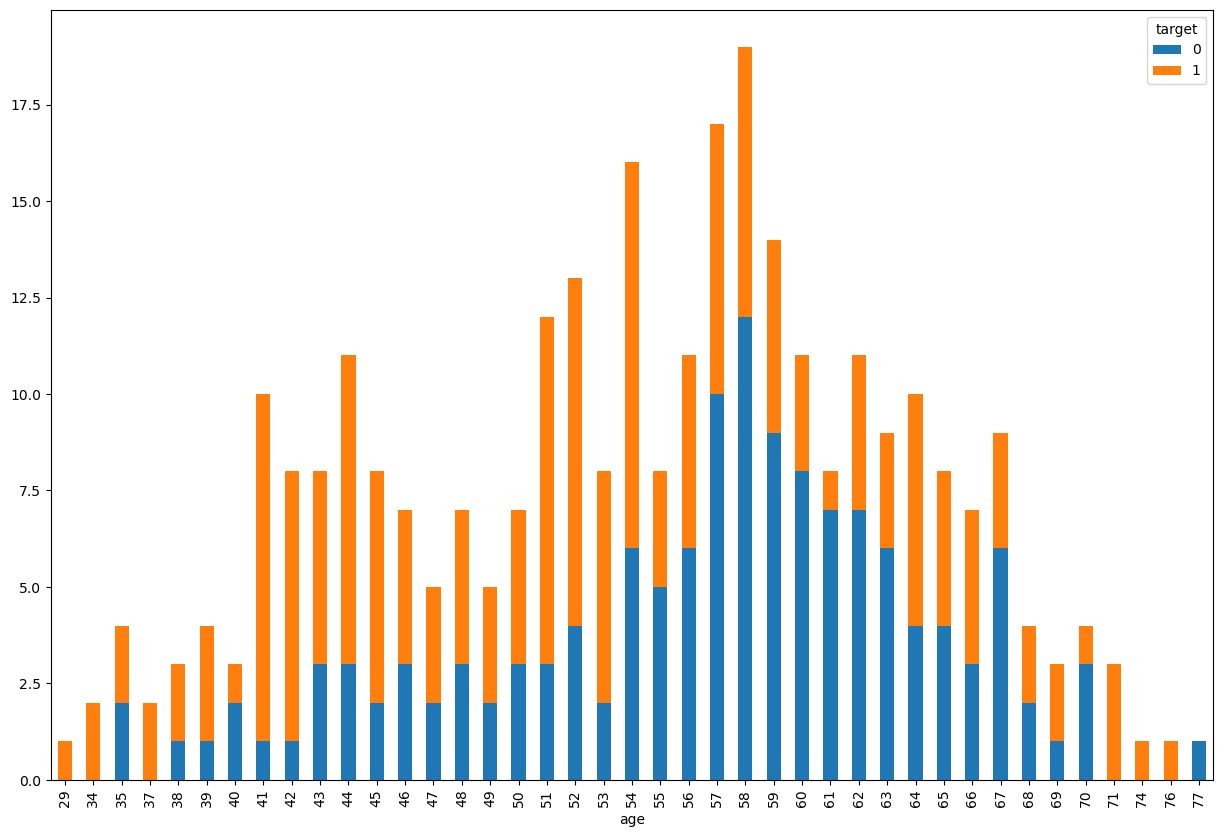

In [12]:
pd.crosstab(df.age, df.target).plot(kind ="bar", figsize =(15,10),stacked =True);

Surprisingly the number of "No Disease" is very less in younger ages but this can be accounted for if we think the number of patients coming in young age are generally one experiencing some discomfort. Wereas in Older patients, many might come due to regular checkups

In [13]:
table1 = pd.crosstab(df.age, df.target)

In [14]:
table1["%"] =(table1[1])*100/(table1[0]+ table1[1])
table1.head()

target,0,1,%
age,,,
29,0,1,100.000000
34,0,2,100.000000
35,2,2,50.000000
37,0,2,100.000000
38,1,2,66.666667


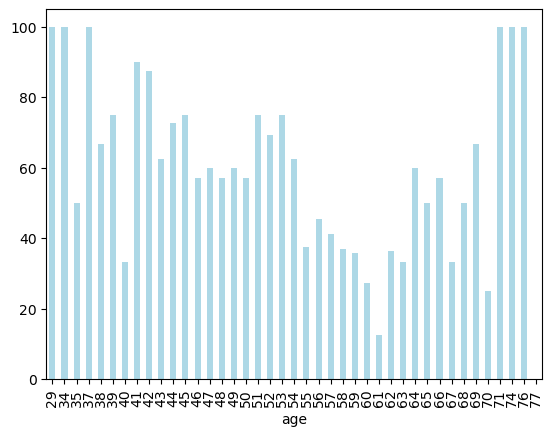

In [15]:
table1["%"].plot(kind="bar",
                color ="lightblue");

This shows the percentage of patients with heart disease according to age

### Comparision Between Chest pain and heart disease

In [16]:
table2 = pd.crosstab(df.cp, df.target)
table2.head()

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

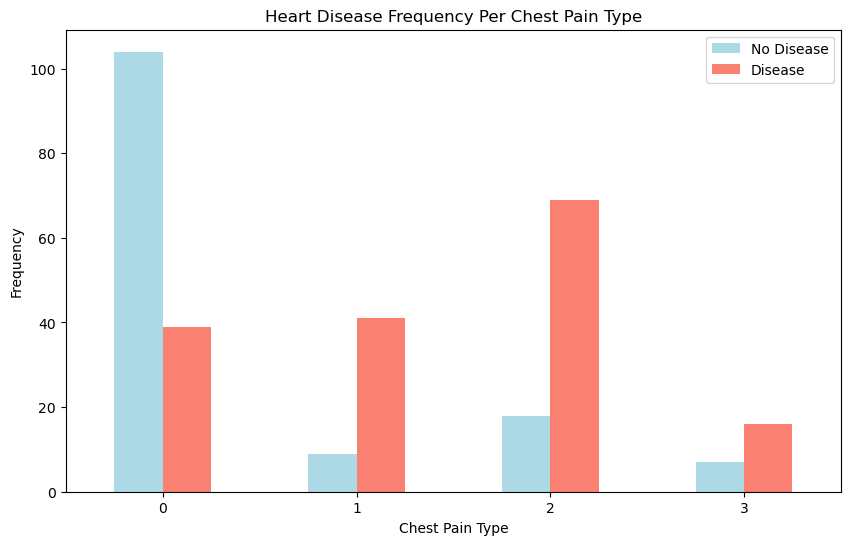

In [17]:
table2.plot(kind="bar", 
            figsize=(10,6), 
            color=["lightblue", "salmon"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [18]:
table2["%"] =(table2[1])*100/(table2[0]+ table2[1])

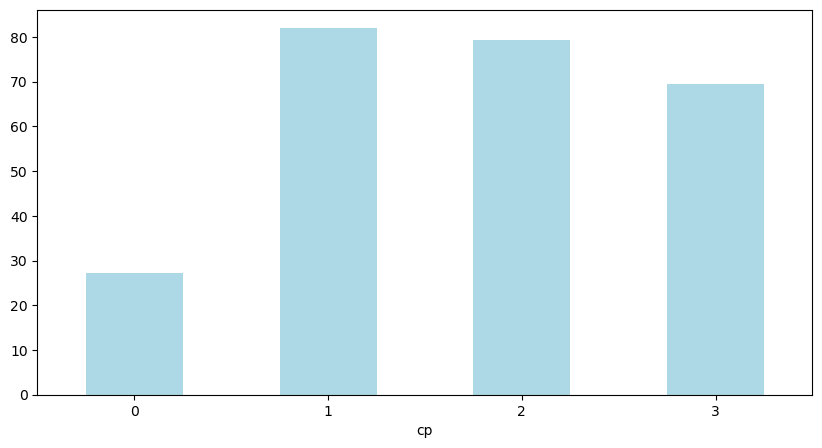

In [19]:
table2["%"].plot(kind="bar",
                color ="lightblue",
                figsize =(10,5));
plt.xticks(rotation= 0);

We find that atypical angina has the lowest rate of target frequency. Its interesting that something not related to heart has this relation

### Comparison between Resting Blood pressure and Heart disease

In [20]:
table3 = pd.crosstab(df.trestbps, df.target)
table3.head()

target,0,1
trestbps,,
94,0,2
100,2,2
101,0,1
102,0,2
104,0,1


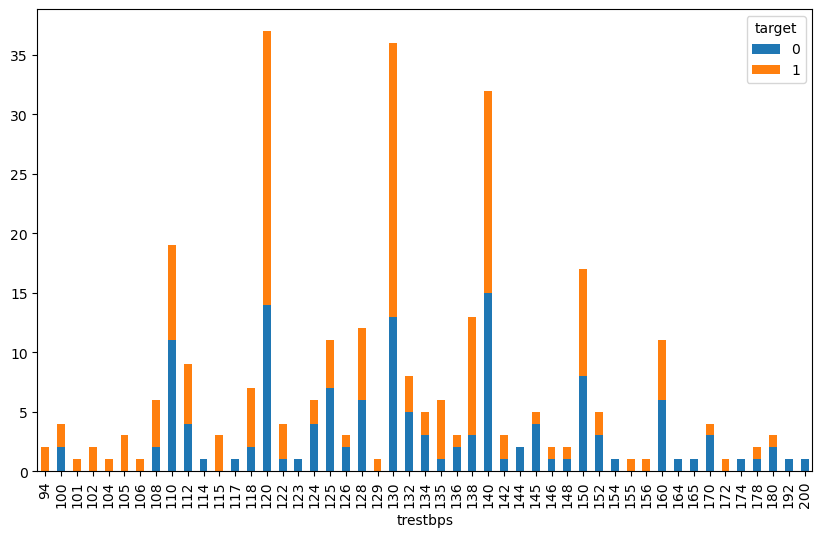

In [21]:
table3.plot(kind ="bar",
            figsize =(10,6),
           stacked =True);

In [22]:
table3["%"] =(table3[1])*100/(table3[0]+ table3[1])

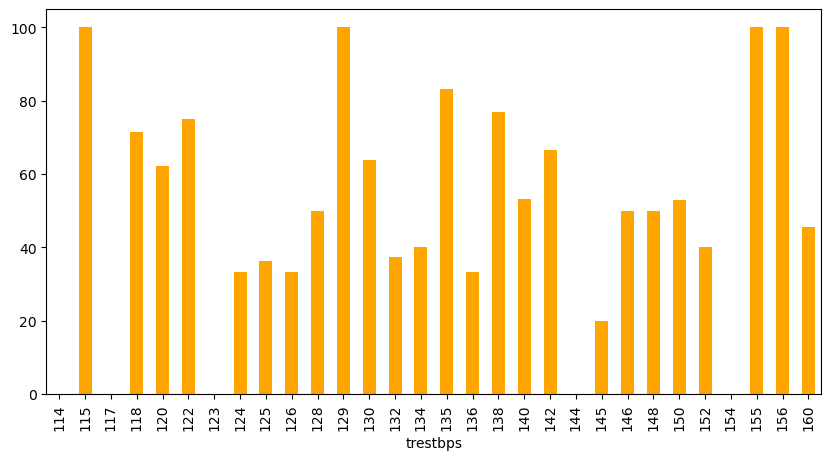

In [23]:
table3["%"].iloc[10:40].plot(kind="bar",
                color ="orange",
                figsize =(10,5));

It is said that anything above 140 is considered dangerous but the graph shows the correlation is very less as the graoh varies very randomly, It can prove effective to remove this column from the model later on to improve the metrics

### Comparison between Serum Cholesterol and Heart disease

In [24]:
table4 = pd.crosstab(df.chol, df.target)
table4.shape

(152, 2)

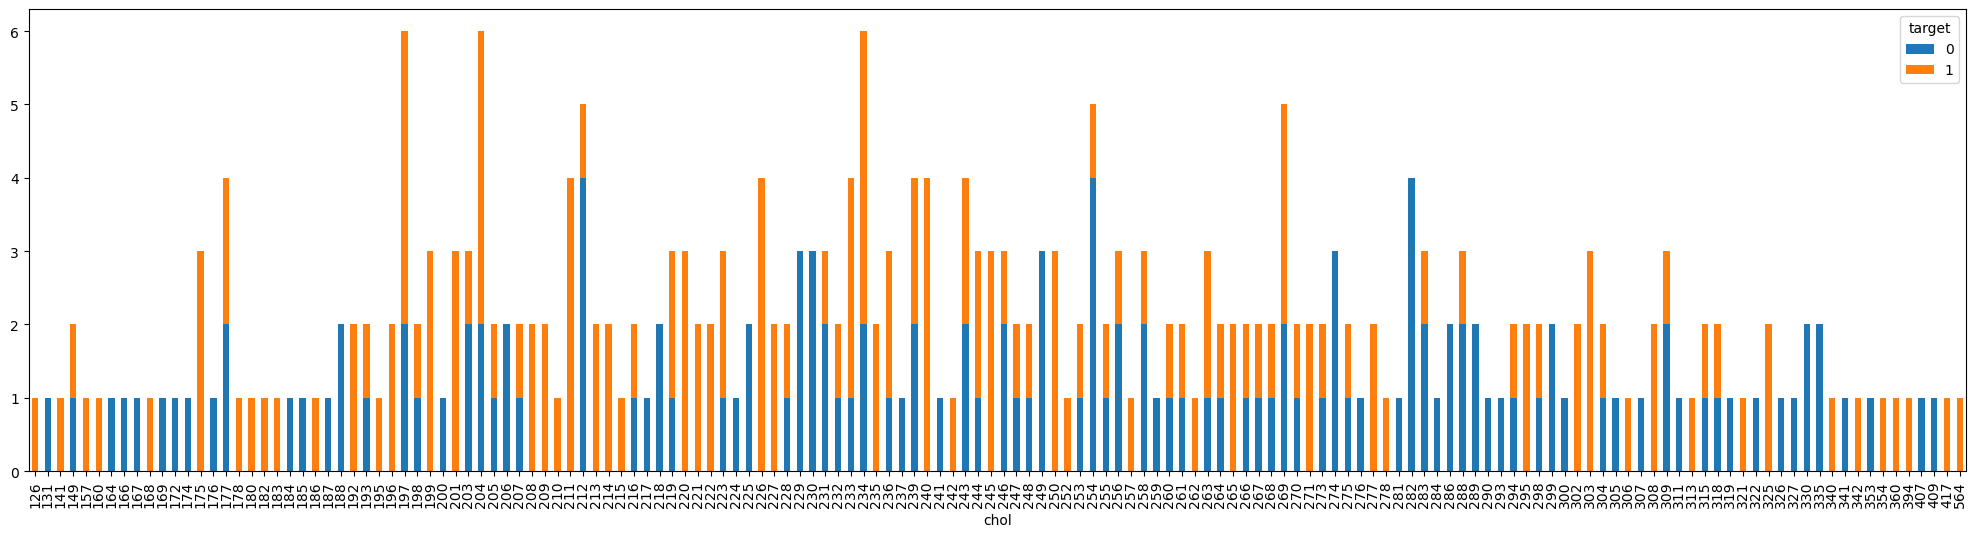

In [25]:
table4.plot(kind ="bar",
            figsize =(25,6),
           stacked =True);

In [26]:
table4["%"] =(table4[1])*100/(table4[0]+ table4[1])

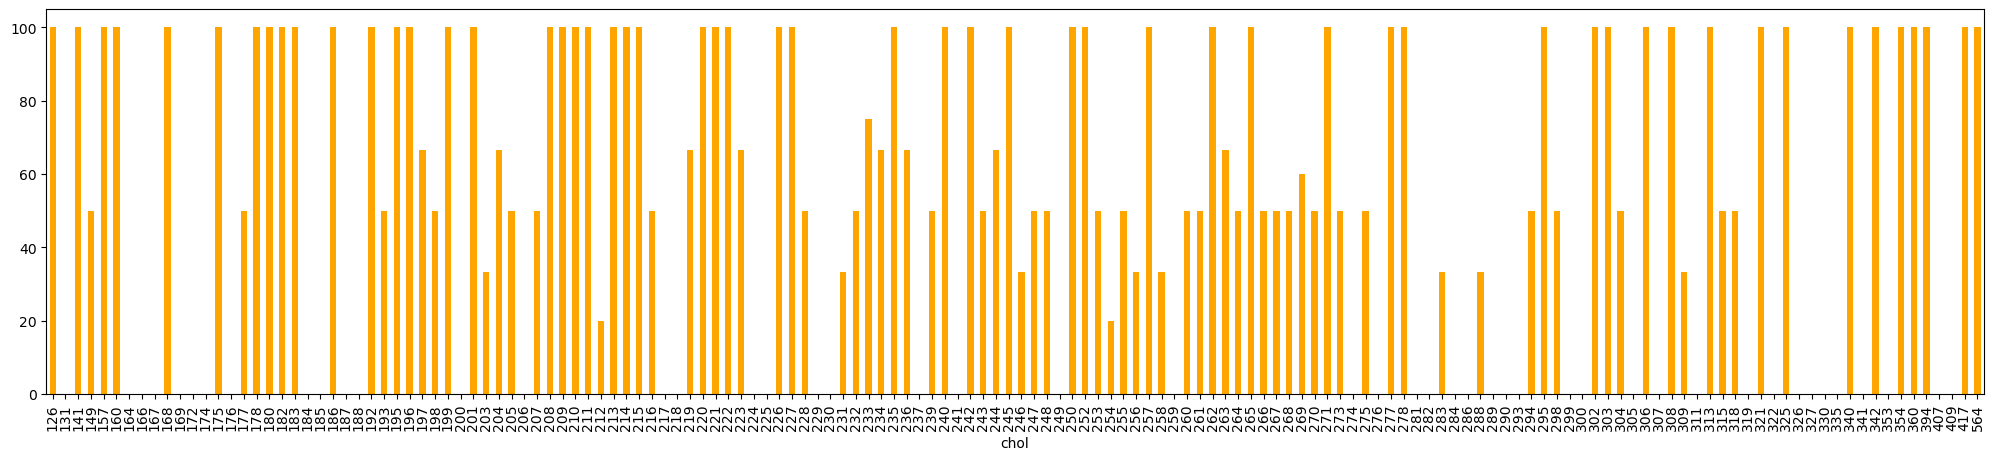

In [27]:
table4["%"].plot(kind="bar",
                color ="orange",
                figsize =(25,5));

this does not give clear cut corelation

### Relation between Diabetes and Heart Disease

In [28]:
table5 = pd.crosstab(df.fbs, df.target)
table5.shape

(2, 2)

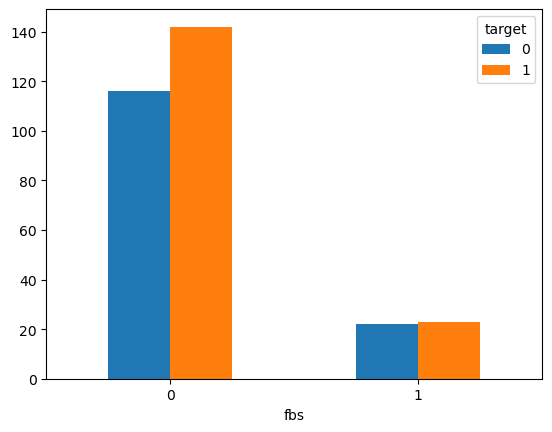

In [29]:
table5.plot(kind="bar");
plt.xticks(rotation= 0);

High Cholesterol levels does not indicate the presense of Heart disease, as it is nearly 50%

### Relation between ECG results and Heart Disease

In [30]:
table6 = pd.crosstab(df.restecg, df.target)
table6.shape

(3, 2)

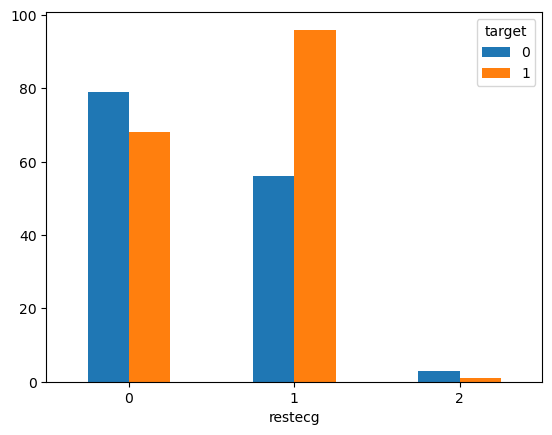

In [31]:
table6.plot(kind="bar");
plt.xticks(rotation= 0);

In [32]:
table6["%"] =(table6[1])*100/(table6[0]+ table6[1])
table6

target,0,1,%
restecg,,,
0,79,68,46.258503
1,56,96,63.157895
2,3,1,25.000000


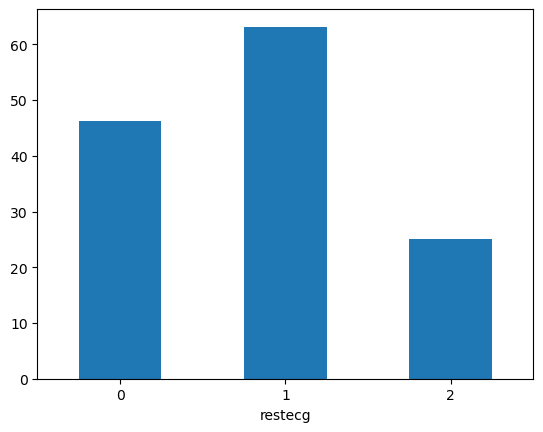

In [33]:
table6["%"].plot(kind="bar");
plt.xticks(rotation= 0);

* When there is nothing to note there is less than half the cases have heart disease
* Where there is ST-T wave abnormality 63% of patients have heart disease
* the sample size of patients having Left ventricular hypertrophy is very less so major correlations cannot be found

### Relation between Maximum heart rate and the frequency of Heart disease

In [34]:
table7 = pd.crosstab(df.thalach, df.target)
table7.shape

(91, 2)

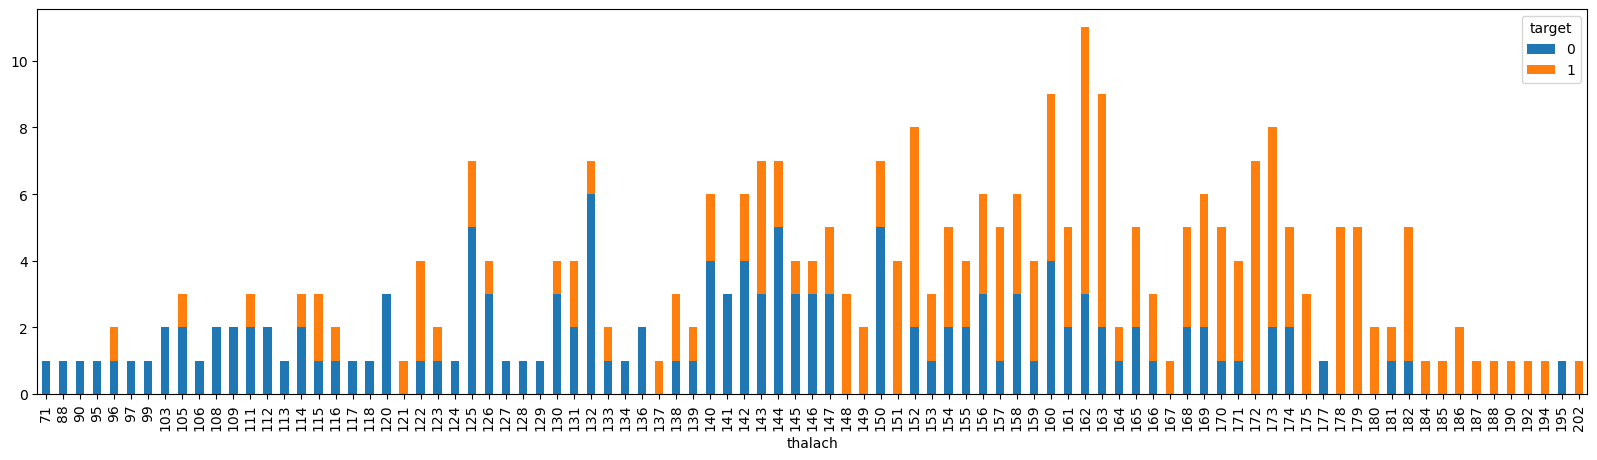

In [35]:
table7.plot(kind="bar",
           figsize=(20,5),
           stacked =True);

We find an increase in the number of heart disease cases, higher is the maximum heart rate is higher. There is an increase in the percentage of them as well

### Relation betweeen excercise indused chest pain and Target frequency

In [36]:
table8 = pd.crosstab(df.exang, df.target)
table8.shape

(2, 2)

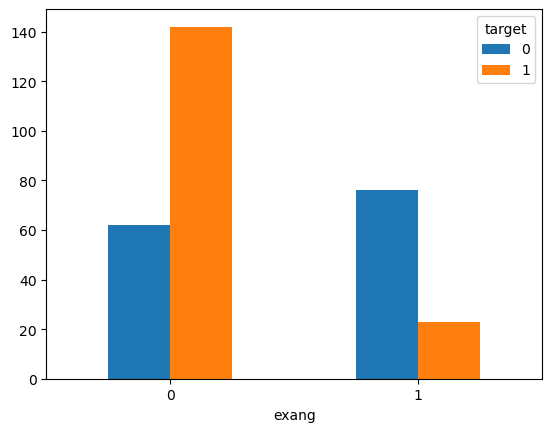

In [37]:
table8.plot(kind="bar");
plt.xticks(rotation= 0);

In [38]:
table8["%"] =(table8[1])*100/(table8[0]+ table8[1])
table8

target,0,1,%
exang,,,
0,62,142,69.607843
1,76,23,23.232323


Exercise induced chest pains means there is only a 23% chance that the patient has heart disease. On the other hand, ppl who do not experience it, surprisingly have a 70% chance of having the Heart disease

### Relation between Stress of heart during excercise and Heart Disease

In [39]:
table9 = pd.crosstab(df.oldpeak, df.target)
table9.shape

(40, 2)

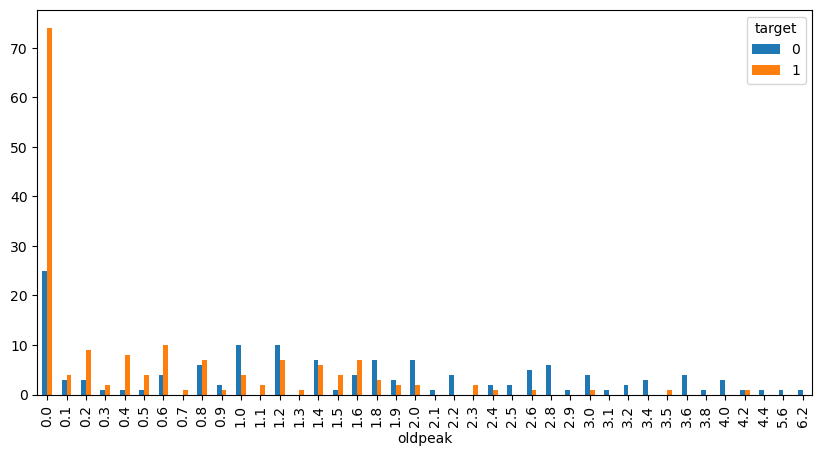

In [40]:
table9.plot(kind="bar",
           figsize=(10,5));

The test says that unhealthy heart will stress more, but the data shows that hearts with the least stress show more cases of heart disease

### Relation between ST Slope and Heart Disease 

In [41]:
table10 = pd.crosstab(df.slope, df.target)
table10.shape

(3, 2)

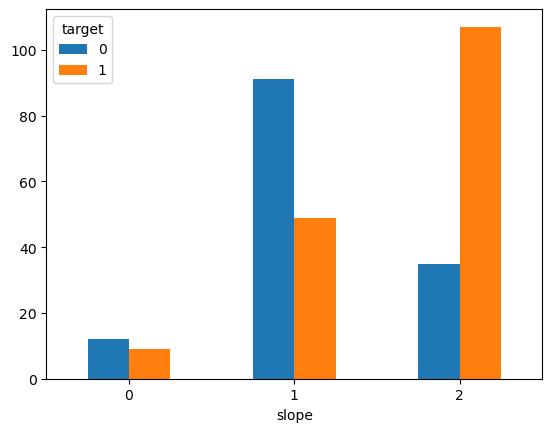

In [42]:
table10.plot(kind="bar");
plt.xticks(rotation= 0);

The data follows the trend as 1. Flatsloping means minimal heart and 2. Downsloping means signs of unhealthy heart

### Relation between Number of mojor vessels coloured by flouroscopy and the Target Frequency

In [43]:
table11 = pd.crosstab(df.ca,df.target)
table11

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


More vessels visisble means better as there si better blood flow and less clots

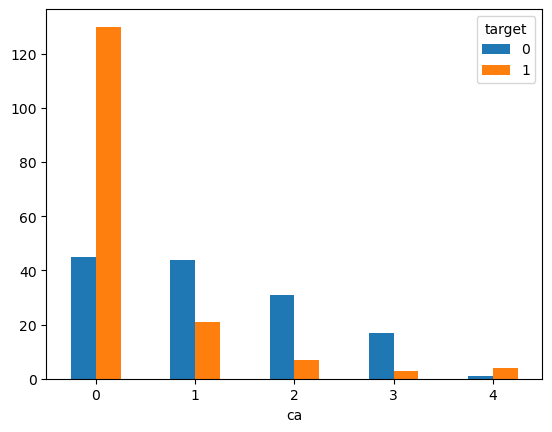

In [44]:
table11.plot(kind="bar");
plt.xticks(rotation= 0);

In [45]:
table11["%"] =(table11[1])*100/(table11[0]+ table11[1])
table11

target,0,1,%
ca,,,
0,45,130,74.285714
1,44,21,32.307692
2,31,7,18.421053
3,17,3,15.000000
4,1,4,80.000000


We find the data back the hypothesis that more vessels visible means less cases of heart disease but there is an outlier in 4 vessels visible but this can be counted for with the less number of sample size

### Relation between Thalium Stress Results and Heart Disease

In [46]:
table12 = pd.crosstab(df.thal,df.target)
table12

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


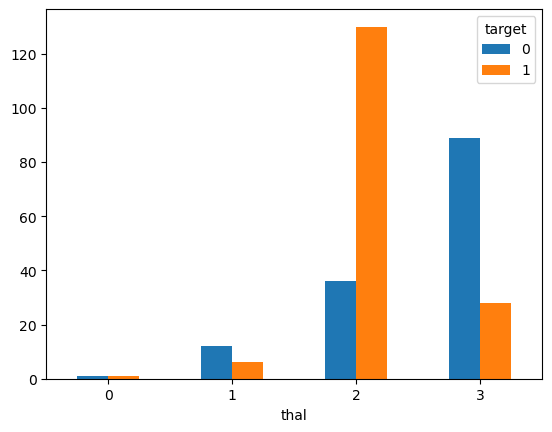

In [47]:
table12.plot(kind="bar")
plt.xticks(rotation =0);

We find that people who have a reversable defect have the most cases of heart disease

#### We have so far found the relation between each of the feature variables against the target variable. 
#### There might also be a some combination of independent variables which can relate to the target 

### Age Vs Max Heart rate for Heart Disease

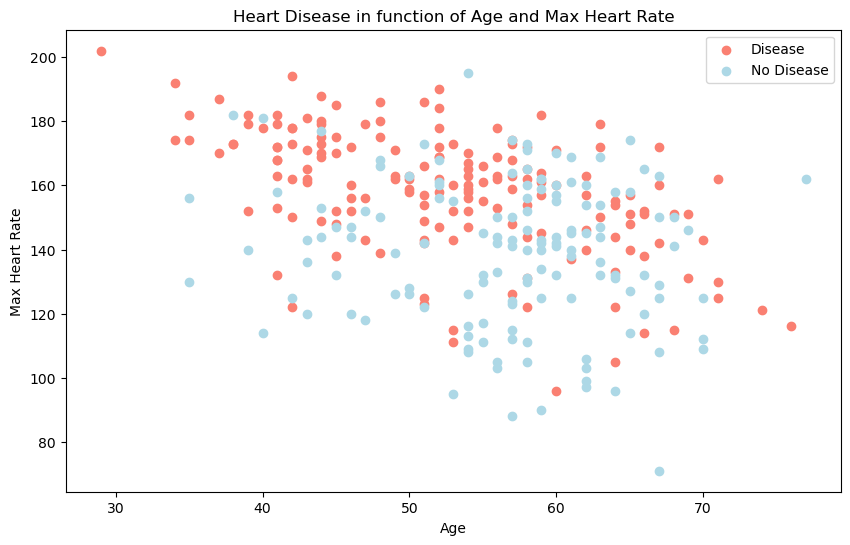

In [48]:
plt.figure(figsize=(10,6))
 
# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

* Here we find that for a particular age range people with higher max heart rate seem to have higher frequency of heart disease similar to our deduction from table7
* Another trend we see is with age the heart rate decreases

### Correlation between independent variables

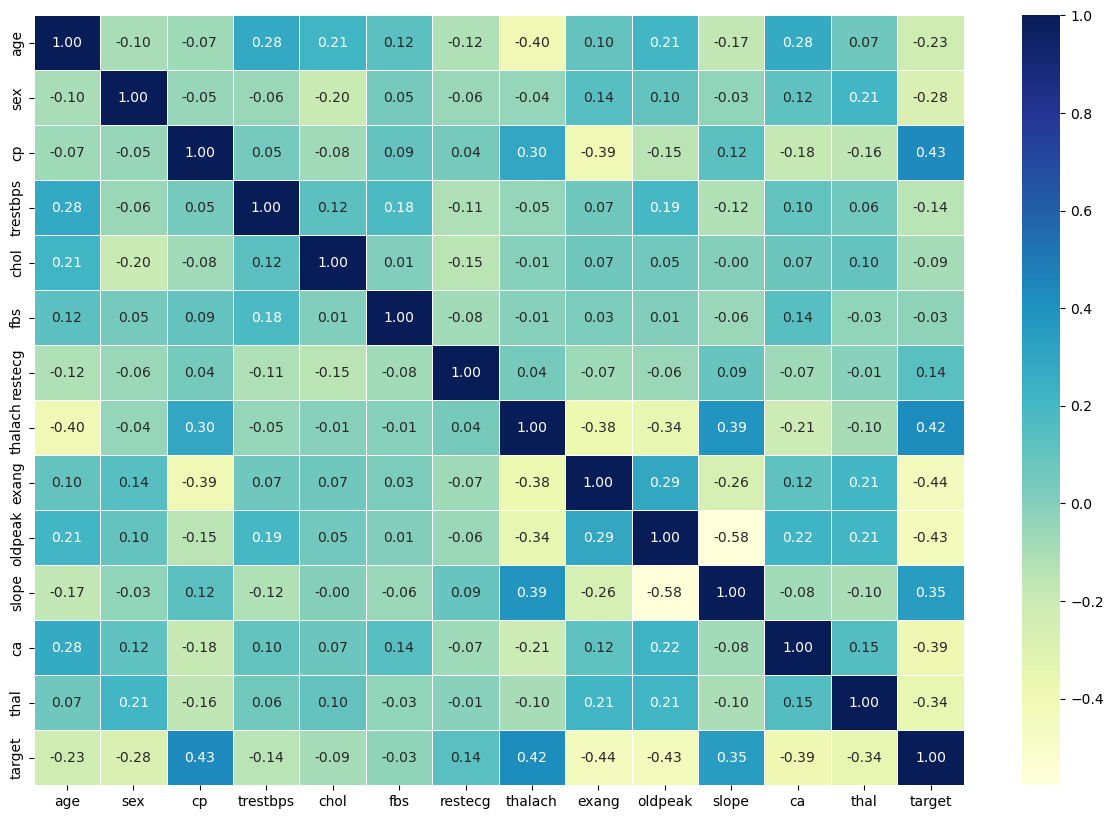

In [49]:
cormatrix = df.corr()
plt.figure(figsize=(15, 10))
#seaborn for heatmap
sns.heatmap(cormatrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");#yellow green blue

* value =1 implies it is exactly equal
* Higher positive number implies higher positive correlation
* Higher negative number implies higher negative correlation

## Modelling
Working towards 90% accuracy at prediction

In [50]:
# split into target and feature dataframes
x = df.drop("target",axis=1)

y= df["target"]

#### split data into train and test sets


In [51]:
np.random.seed(0) # random seed for reproducability 

x_train, x_test, y_train,y_test = train_test_split(x,
                                                   y, 
                                                   test_size=0.2)

In [52]:
len(y_train), len(x_train)

(242, 242)

Model Choices used:
* LogisticRegression
* K-Nearest Neighbours
* RandomForest

In [53]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# A function for fitting and scoring models

def fit_score(models,x_train,x_test, y_train,y_test):
    np.random.seed(0)
    score = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        score[name] = model.score(x_test,y_test)
    return score


In [54]:
model_score = fit_score(models,
                       x_train,
                       x_test,
                       y_train,
                       y_test)
model_score

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8852459016393442}

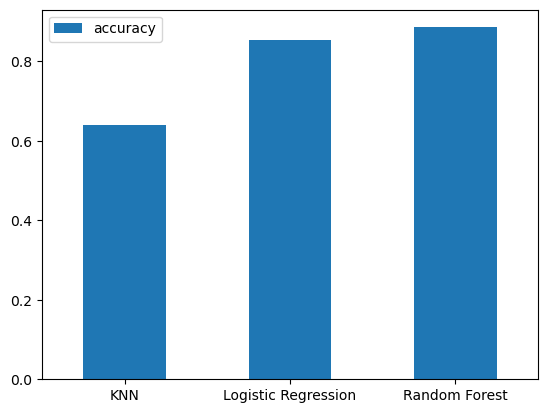

In [55]:
model_compare = pd.DataFrame(model_score , index =["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation =0);

## Hyper-Parameter tuning and Model metrics

In [56]:
### Tuning KNN 

train_scores = []
test_scores =[]
neighbours = range (1,21) # value of k i neighbours ranges from 1 to 20

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i) # set neoghbours value
    knn.fit(x_train , y_train)
    train_scores.append(knn.score(x_train,y_train))
    
    test_scores.append(knn.score(x_test,y_test))


In [57]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [58]:
test_scores

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


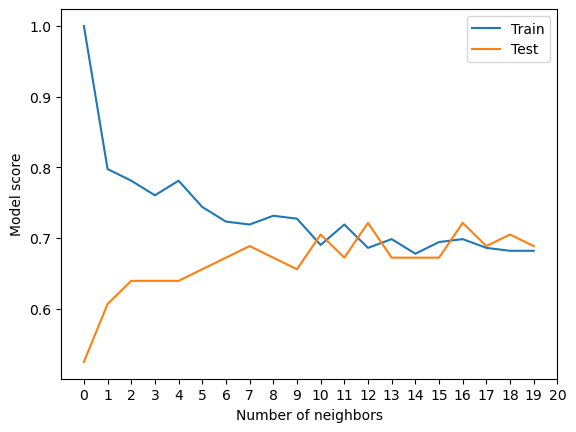

In [59]:
plt.plot(train_scores , label = "Train")
plt.plot(test_scores , label = "Test")
plt.xticks(np.arange(0, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


The Best case for KNN itself is less than Logistic Regression and Random Forest

### Tuning using RandomisedSearchCV

Values for these parameters are taken from simple google search for the best case 

In [60]:
# grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty":["none", "l1", "l2", "elasticnet"],
                "solver": ["liblinear", "sag"]}

# grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### Logistic Regression

In [61]:
# Setup random seed
np.random.seed(0)

# Random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=200,
                                verbose=True)

rs_log_reg.fit(x_train, y_train);

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 160 is smaller than n_iter=200. Running 160 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

Fitting 5 folds for each of 160 candidates, totalling 800 fits


d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\sit

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: Fut

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}

In [63]:
rs_log_reg.score(x_test, y_test)

0.8524590163934426

This is equal to the baseline model, after various iterations, possibly because it is a good fit for the model

### RandomForestClassifier

In [64]:
# Setup random seed
np.random.seed(0)

# Random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=3,
                           n_iter=15,
                           verbose=True)

rs_rf.fit(x_train, y_train);

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [65]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [66]:
rs_rf.score(x_test, y_test)

0.8688524590163934

In [67]:
# the best Untill now has been the baseline RandomForestClassifier

### Tuning Using GridSearchCv 

In [68]:
# Setup random seed
np.random.seed(0)

# Random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 160 candidates, totalling 800 fits


d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: Fut

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: Fut

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: Fut

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: Fut

d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Heart_Disease_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: Fut

In [69]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}

In [70]:
gs_log_reg.score(x_test, y_test)

0.8524590163934426

In [71]:
rf_grid = {"n_estimators": np.arange(10, 600, 50),
           "max_depth": [None],
           "min_samples_split": np.arange(14, 20, 2),
           "min_samples_leaf": np.arange(4, 10, 2)}

In [72]:
# Setup random seed
np.random.seed(0)

# Random hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=3,
                           verbose=True)

gs_rf.fit(x_train, y_train);

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [73]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [74]:
rs_rf.score(x_test, y_test)

0.8688524590163934

## Classification Metrics

### ROC and AUC 

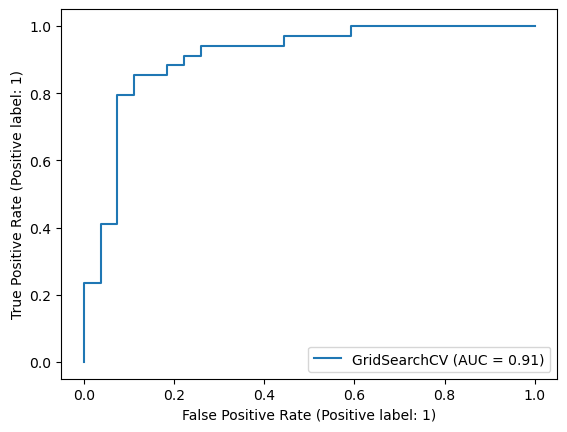

In [88]:
# Logistic Regression after tuning
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

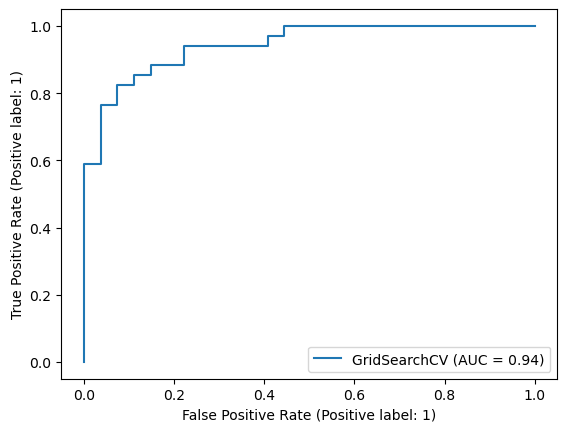

In [89]:
# Random Forest after the tuning 
RocCurveDisplay.from_estimator(gs_rf, x_test, y_test);

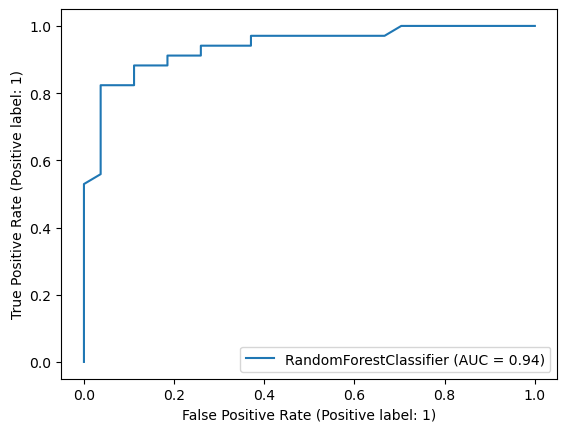

In [91]:
RocCurveDisplay.from_estimator(models["Random Forest"], x_test, y_test);

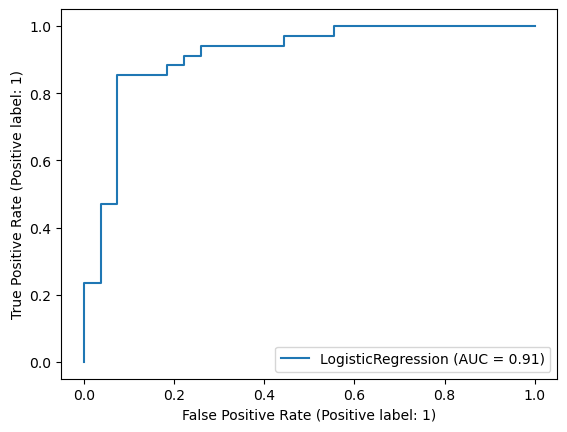

In [92]:
RocCurveDisplay.from_estimator(models["Logistic Regression"], x_test, y_test);

An AUC value of 0.91 and 0.94 means the model is very good than guessing = 0.5 but still room for improvement as max value is 1. We also find that tuning does not change the AUC score much

### Confusion Matrix

In [111]:
# For Base line Logistic Regression
y_preds = models["Logistic Regression"].predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [112]:
print(confusion_matrix(y_test, y_preds))

[[22  5]
 [ 4 30]]


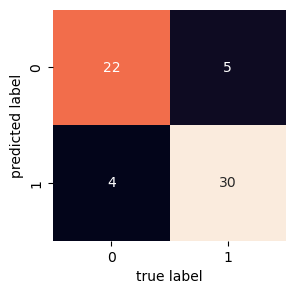

In [113]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [114]:
# Fore tuned Logistic regression
y_preds1 = gs_log_reg.predict(x_test)
y_preds1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [115]:
print(confusion_matrix(y_test, y_preds1))

[[22  5]
 [ 4 30]]


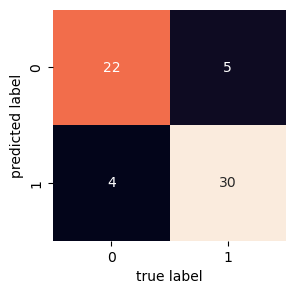

In [116]:
plot_conf_mat(y_test, y_preds1)

In [117]:
# For base line RandomForestClassifier
y_preds2 = models["Random Forest"].predict(x_test)
y_preds2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [118]:
print(confusion_matrix(y_test, y_preds2))

[[24  3]
 [ 4 30]]


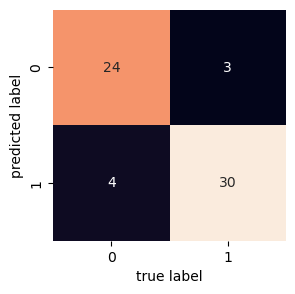

In [119]:
plot_conf_mat(y_test, y_preds2)

In [120]:
# For tuned RandomForest
y_preds3 = gs_rf.predict(x_test)
y_preds3

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [121]:
print(confusion_matrix(y_test, y_preds3))

[[21  6]
 [ 3 31]]


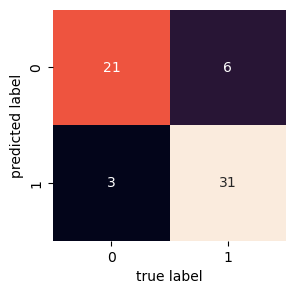

In [122]:
plot_conf_mat(y_test, y_preds3)

With regard to the Confusion Matrix also we find that Baseline RandomForestClassifier is best among all the models so far

### Classification Report

In [123]:
#Baseline Logistic Regerssion
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [124]:
# Tuned Logistic Regression
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [125]:
# Baseline Random Forest
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [126]:
# Tuned Random Forest
print(classification_report(y_test, y_preds3))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



These are for one iteration, we need to involve cross validation for accurate numbers

Since we Find that the Baseline Random Forest is the best in all metrics, we'll be using that now


In [130]:
clf = models["Random Forest"]

In [132]:
# ACCURACY
cv_acc = np.mean(cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy"))
# PRECISION
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, 
                                       scoring="precision")) 
# RECALL
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, 
                                    scoring="recall")) 
#f1
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring="f1")) 

In [134]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=["Value"])
cv_metrics

,Accuracy,Precision,Recall,F1
Value,0.831585,0.8196,0.842424,0.837612


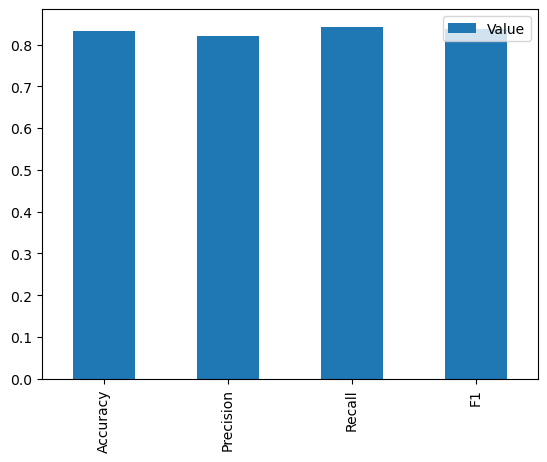

In [137]:
cv_metrics.T.plot(kind="bar");

### Feature Importance
Which feature is most important in the prediction?

#### RandomForestClassifier

In [138]:
clf.feature_importances_

array([0.09152288, 0.05432033, 0.12376781, 0.07200952, 0.08098243,
       0.00952842, 0.0199568 , 0.11505287, 0.06094714, 0.10346018,
       0.04074291, 0.13313724, 0.09457148])

In [165]:
features_dict = dict(zip(df.columns, list(clf.feature_importances_)))
features_dict

{'age': 0.09152288275135236,
 'sex': 0.05432033437870336,
 'cp': 0.12376781440173844,
 'trestbps': 0.07200951786745359,
 'chol': 0.08098242604350965,
 'fbs': 0.009528416752745916,
 'restecg': 0.01995679965009203,
 'thalach': 0.11505286500760438,
 'exang': 0.060947143197586026,
 'oldpeak': 0.10346017935045032,
 'slope': 0.040742905010316556,
 'ca': 0.13313724030924798,
 'thal': 0.09457147527919958}

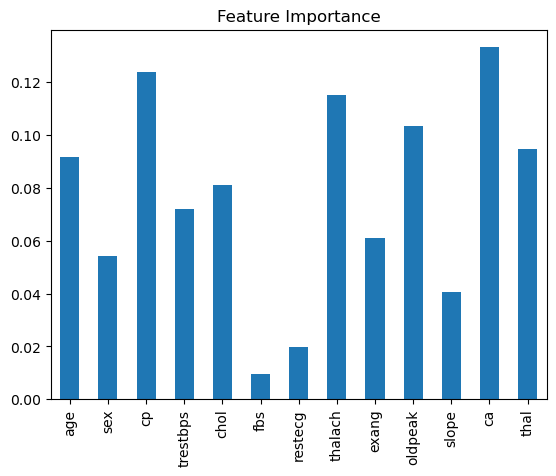

In [166]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

#### Feature Importance of Logistic Regression

In [167]:
clf2 =models["Logistic Regression"]
features_dict1 = dict(zip(df.columns, list(clf2.coef_[0])))
features_dict1

{'age': 0.00876215462771856,
 'sex': -1.3957384910756556,
 'cp': 0.7332895313398874,
 'trestbps': -0.008868441488667844,
 'chol': -0.003526150759686668,
 'fbs': -0.2779573667401363,
 'restecg': 0.27858901401838027,
 'thalach': 0.03138778274102295,
 'exang': -0.8103148977772997,
 'oldpeak': -0.5222172063711045,
 'slope': 0.19214120610967475,
 'ca': -0.8339782678756965,
 'thal': -0.7745262526841895}

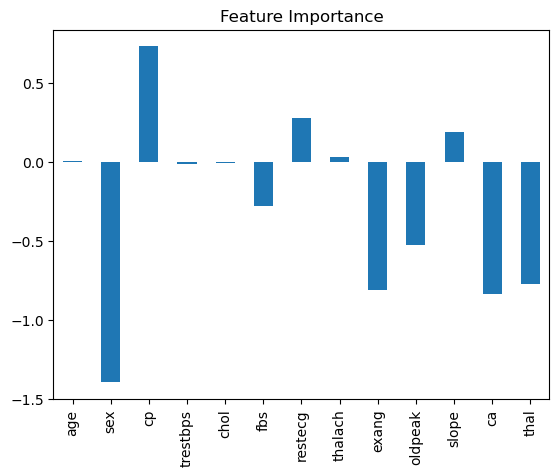

In [169]:
features_df = pd.DataFrame(features_dict1, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Although we didnt get the required accuracy of 90% we got a pretty close to the goal with highest accuracy of 88.52% and a mean crossvalidated accuracy of 83.15% 